<a href="https://colab.research.google.com/github/NiallJeffrey/MomentNetworks/blob/master/MomentNetwork_100dim/moment_network_100D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Make network estimate 2 parameter mean, variance and covariance as a function of numer of training data

# Load modules

In [8]:
# !pip install emcee getdist
# !pip install chainconsumer
# !sudo apt-get install texlive-latex-extra texlive-fonts-recommended dvipng cm-super 

import numpy as np

In [3]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from momentnetworks import demo

In [4]:
# from google.colab import files
# from getdist import plots, MCSamples
import scipy.interpolate as interpolate
import time
%matplotlib inline

In [5]:
# def generate__signal(size, n_training):
#   cov_signal_fourier = np.identity(size)*np.logspace(size,size*0.9,size)/np.sum(np.logspace(size,size*0.9,size))

#   training_z = np.random.multivariate_normal(np.zeros(size),cov_signal_fourier,n_training) + \
#                   1j*np.random.multivariate_normal(np.zeros(size), cov_signal_fourier,n_training)
#   training_z = np.fft.fft(training_z).real

#   cov_signal = np.identity(size)*0.
#   mean_z = np.mean(training_z,axis=0)
#   for i in range(n_training-1):
#     cov_signal += np.outer(training_z[i] - mean_z,training_z[i]-mean_z) /np.float(n_training-1.)

#   cov_signal = np.where((cov_signal<0.9)&(cov_signal>0.2),cov_signal+0.3,cov_signal)
#   training_z = np.random.multivariate_normal(np.zeros(size),cov_signal,n_training)

#   cov_signal = np.identity(size)*0.
#   mean_z = np.mean(training_z,axis=0)
#   for i in range(n_training-1):
#     cov_signal += np.outer(training_z[i] - mean_z,training_z[i]-mean_z) /np.float(n_training-1.)

#   cov_signal_inv = np.linalg.pinv(cov_signal)

#   return training_z, cov_signal, cov_signal_inv

In [6]:
n_training = 8000
size=10

training_z, cov_signal, cov_signal_inv = demo.generate__signal(size, n_training)

In [9]:
cov_noise = np.identity(size)*4
cov_noise_inv = np.linalg.pinv(cov_noise)
training_data = training_z +  np.random.multivariate_normal(np.zeros(size),cov_noise,n_training)

training_z_obs = [0.014, 0.996, 0.865, -0.25, 0.591, -0.104, 1.376, 1.022, 0.901, 0.835, 0.602, -0.157, -0.398, 0.483, -0.498, -1.437, -0.194, -0.535, -1.487, -1.103, -0.804, -0.741, -2.356, -0.235, -0.377, -0.081, 0.407, 0.777, 1.065, 0.959, 0.604, 2.419, 1.796, 1.261, 0.352, 1.648, 1.197, 0.782, 1.352, 1.61, 1.166, 0.497, 0.407, 0.737, 0.375, -0.484, 1.102, 1.316, 0.607, 1.3, 1.173, -0.642, -0.421, 0.53, 0.918, 1.763, 0.936, 1.27, 1.421, 1.757, 0.264, -0.061, 0.161, -0.033, 0.783, 0.533, 0.98, 0.509, 0.363, -1.247, -0.803, 0.065, -0.025, -0.073, 0.241, -0.744, 0.153, -0.711, 0.645, -0.539, -0.37, -0.748, -0.558, -0.188, 0.068, -0.524, -0.882, -0.367, -0.424, -0.93, -1.455, -2.157, -2.84, -0.588, -2.276, 0.246, -0.958, -0.591, 0.14, 0.156]
training_data_obs = [-1.607, 3.04, -0.357, -1.089, 2.622, -1.42, 4.596, -0.384, 4.087, -1.155, 1.745, -0.054, -3.418, -1.398, 1.598, 2.363, -1.018, -0.183, -1.317, -0.787, -0.046, 0.762, -4.387, 2.829, 2.406, 0.452, -0.132, -3.245, -1.389, 0.862, -0.146, -1.218, -0.634, 0.22, 2.792, 5.549, 5.298, 1.558, -2.26, -0.169, 2.297, 0.402, 0.644, 1.033, 3.076, -1.034, -3.227, 3.307, 0.463, 2.226, 2.847, 1.456, 1.012, 2.702, 2.812, 6.682, -1.643, 0.749, 2.727, 3.234, 0.139, 0.077, -0.899, 1.283, 3.093, -0.528, 2.225, 2.873, 1.314, -0.133, -1.184, 1.331, 1.148, 3.614, -0.678, 0.146, 1.136, -3.905, 0.178, 2.195, -0.533, -2.579, -1.13, -5.215, 2.584, 0.939, 0.083, -0.946, -0.288, -1.261, -1.456, -5.345, -0.291, 0.373, 0.689, 2.976, -3.337, 0.945, -0.807, -0.796]

training_z = training_z[1:]
training_data = training_data[1:]

# Do MCMC

In [9]:
n_dim=size
n_burn=5000
n_steps = 50000
n_walkers = 2 * n_dim

sampler_likelihood = mc.EnsembleSampler(n_walkers, n_dim, demo.log_posterior_likelihood,
                             args=(training_data_obs,cov_signal_inv,cov_noise_inv,))

In [10]:
theta_expected_mean = [0.1]*size
theta0 = np.array([list(demo.initial_parameters(theta_expected_mean, 1)) for i in range(n_walkers)])

In [11]:
t = time.time()
_ =sampler_likelihood.run_mcmc(theta0, n_steps) 

flat_samples_likelihood = sampler_likelihood.get_chain(discard=n_burn, flat=True,thin=3)

flat_samples_likelihood = np.array(flat_samples_likelihood[:,:2],dtype=np.float32)
gc.collect()

26

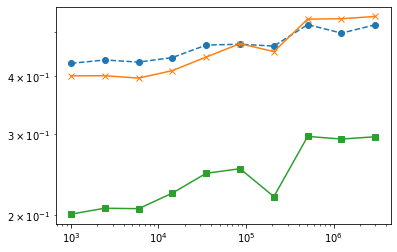

In [12]:
n_samples = flat_samples_likelihood.shape[0]
intervals = np.logspace(3,np.log10(n_samples), 10, dtype=int)
var_0 = []
var_1 = []
cov_01 = []
for sub_sample in intervals:
  covar = np.cov(flat_samples_likelihood[:sub_sample,0],flat_samples_likelihood[:sub_sample,1])
  var_0.append(covar[0,0])
  var_1.append(covar[1,1])
  cov_01.append(covar[0,1])
_ = plt.plot(intervals, var_0, 'o--')
_ = plt.plot(intervals, var_1, marker='x')
_ = plt.plot(intervals, cov_01, marker='s')
_ = plt.xscale('log'), plt.yscale('log')

Removed no burn in


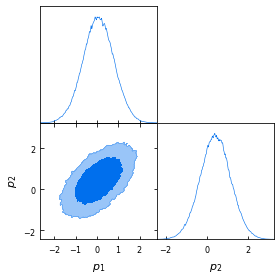

In [13]:
samples2 = MCSamples(samples=flat_samples_likelihood[:,:2],label='lik')

g = plots.get_subplot_plotter()
g.triangle_plot([samples2], filled=True)

In [14]:
np.cov(flat_samples_likelihood[:,0],flat_samples_likelihood[:,1])

array([[0.51773446, 0.29584813],
       [0.29584813, 0.53973972]])

# Moment network

In [15]:
class simple_leaky():
    """
    A simple MLP with LeakyReLU activation
    """
    
    def __init__(self, input_size, output_size, learning_rate=None):
        """
        Initialisation
        :param map_size: size of square image (there are map_size**2 pixels)
        :param learning_rate: learning rate for the optimizer
        """
        self.input_size = input_size
        self.learning_rate = learning_rate
        self.output_size = output_size
        
    def model(self):
        print(self.input_size)
        
        input_data = (Input(shape=(self.input_size,)))

        x1 = Dense(self.input_size, input_dim=self.input_size, kernel_initializer='normal')(input_data)
        x1 = LeakyReLU(alpha=0.1)(x1)
        x2 = Dense(self.input_size*2, kernel_initializer='normal')(x1)
        x2 = LeakyReLU(alpha=0.1)(x2)
        x3 = Dense(self.input_size, kernel_initializer='normal')(x2)
        x3 = LeakyReLU(alpha=0.1)(x3)
        x4 = Dense(self.output_size, kernel_initializer='normal')(x3)
        

        dense_model = Model(input_data, x4)
        dense_model.summary()

        if self.learning_rate is None:
            dense_model.compile(optimizer='adam', loss='mse')
        else:
            dense_model.compile(optimizer=optimizers.Adam(lr=self.learning_rate), loss='mse')

        return dense_model

validation_index = np.int(n_training * 0.8)

In [16]:
gc.collect()

13506

In [17]:
model_instance = simple_leaky(size,2, learning_rate=1e-4)
regression = model_instance.model()

100
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense (Dense)                (None, 100)               10100     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 100)          

In [18]:
history = regression.fit(training_data[:validation_index],
                               training_z[:validation_index,:2],
                               epochs =7,batch_size =50, shuffle=True,
                               validation_data = (training_data[validation_index:],
                               training_z[validation_index:,:2]))

Epoch 1/7
1280/1280 [==============================] - 2s 2ms/step - loss: 0.6273 - val_loss: 0.5570
Epoch 2/7
1280/1280 [==============================] - 2s 2ms/step - loss: 0.5493 - val_loss: 0.5510
Epoch 3/7
1280/1280 [==============================] - 2s 2ms/step - loss: 0.5417 - val_loss: 0.5487
Epoch 4/7
1280/1280 [==============================] - 2s 2ms/step - loss: 0.5372 - val_loss: 0.5480
Epoch 5/7
1280/1280 [==============================] - 2s 2ms/step - loss: 0.5334 - val_loss: 0.5489
Epoch 6/7
1280/1280 [==============================] - 2s 2ms/step - loss: 0.5298 - val_loss: 0.5500
Epoch 7/7
1280/1280 [==============================] - 2s 2ms/step - loss: 0.5265 - val_loss: 0.5528


In [19]:
predicted_mean = regression.predict(np.atleast_2d(training_data))
predicted_mean_obs = regression.predict(np.atleast_2d(training_data_obs))

In [20]:
training_var_unknown_mean = (training_z[:,:2]-regression.predict(np.atleast_2d(training_data)))**2.
training_var_unknown_mean = np.hstack([training_var_unknown_mean,
                                      np.atleast_2d((training_z[:,0]-regression.predict(np.atleast_2d(training_data))[:,0])*
                                      (training_z[:,1]-regression.predict(np.atleast_2d(training_data))[:,1])).T])
training_var_unknown_mean.shape

(79999, 3)

In [21]:
model_instance = simple_leaky(size,3, learning_rate=1e-4)
regression_var_unknown_mean = model_instance.model()

100
Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 200)               20200     
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 200)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               20100     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 100)          

In [22]:
history = regression_var_unknown_mean.fit(training_data[:validation_index],
                               training_var_unknown_mean[:validation_index,:3],
                               epochs =5,batch_size =50, shuffle=True,
                               validation_data = (training_data[validation_index:],
                               training_var_unknown_mean[validation_index:,:3]))

Epoch 1/5
1280/1280 [==============================] - 2s 2ms/step - loss: 0.4890 - val_loss: 0.5309
Epoch 2/5
1280/1280 [==============================] - 2s 2ms/step - loss: 0.4810 - val_loss: 0.5300
Epoch 3/5
1280/1280 [==============================] - 2s 2ms/step - loss: 0.4787 - val_loss: 0.5288
Epoch 4/5
1280/1280 [==============================] - 2s 2ms/step - loss: 0.4764 - val_loss: 0.5294
Epoch 5/5
1280/1280 [==============================] - 2s 2ms/step - loss: 0.4740 - val_loss: 0.5316


In [23]:
t = time.time()
predicted_var_obs = (regression_var_unknown_mean.predict(np.atleast_2d(training_data_obs[:]))[0])
print(time.time() - t)
print(predicted_var_obs)

0.06843876838684082
[0.5991414  0.6721985  0.36777443]


In [24]:
likelihood_param_cov = np.cov(flat_samples_likelihood[:,0],flat_samples_likelihood[:,1])

In [25]:
moment_network_param_cov = np.copy(likelihood_param_cov)
moment_network_param_cov[0,0] = predicted_var_obs[0]
moment_network_param_cov[1,1] = predicted_var_obs[1]
moment_network_param_cov[0,1] = predicted_var_obs[2]
moment_network_param_cov[1,0] = predicted_var_obs[2]

In [26]:
moment_network_samples = np.array(np.random.multivariate_normal(predicted_mean_obs[0],moment_network_param_cov,int(1e6)),dtype=np.float32)
gc.collect()

4385

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

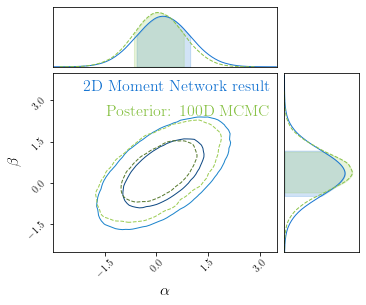

In [27]:
c = ChainConsumer()

c.add_chain(moment_network_samples,
            parameters=[r'$\alpha$', r'$\beta$'],
            name = '2D Moment Network result', color_params='C1')


c.add_chain(flat_samples_likelihood[:,:2],
            parameters=[r'$\alpha$', r'$\beta$'],
            name = 'Posterior: 100D MCMC', linestyle='--')

c.configure(kde=[1.,None],sigmas = [1,2],
            contour_label_font_size = 11,
            label_font_size = 16, shade = False) 

fig = c.plotter.plot(figsize = (5,4), extents=[[-3.,3.5],[-2.5,4]], filename='marginal_moments.pdf')
files.download('marginal_moments.pdf')

Removed no burn in
Removed no burn in


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x324 with 0 Axes>

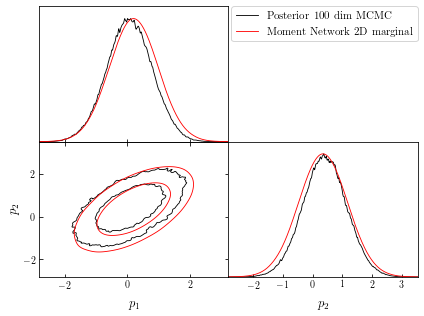

In [28]:
samples2 = MCSamples(samples=flat_samples_likelihood[:,:2],label='Posterior 100 dim MCMC')
samples_moment = MCSamples(samples=moment_network_samples,label='Moment Network 2D marginal')

g = plots.get_single_plotter(width_inch=6)

g.triangle_plot([samples2, samples_moment], filled=False )
plt.savefig('test.png', dpi=300)
files.download('test.png')